# Black-Friday-Regression-Analysis
Predicting Prices for the products to be sold on Black Friday in US using Regression Analysis, Feature Engineering, Feature Selection, Feature Extraction and Data analysis - Data Visualizations.

Description The dataset here is a sample of the transactions made in a retail store. The store wants to know better the customer purchase behaviour against different products. Specifically, here the problem is a regression problem where we are trying to predict the dependent variable (the amount of purchase) with the help of the information contained in the other variables.

Classification problem can also be settled in this dataset since several variables are categorical, and some other approaches could be "Predicting the age of the consumer" or even "Predict the category of goods bought". This dataset is also particularly convenient for clustering and maybe find different clusters of consumers within it.



# Making Assumptions -

Lets think what factor can affect the purchase of product based on different segment. It could be so many things.
So I am segregating this into different groups - 

 ## 1 - City Level Hypotheses:

### City Type and Size : Urban or Tier 1 cities should have higher sales because of the higher income levels of people there.
    
### Population Density: Cities with densely populated areas should have higher sales because of more demand.
    
### Younger Population : Cities with younger populations might have higher tendency to spend more on Black Friday

## 2 -Customer Level Hypotheses:

### Income: People with higher income should spend more on products.

### Age and Gender: Men with ages ranging from 25 to 40 should spend more on techlogical products.

### Family Size: Families should be more contained on spendings, just buying the best offers and only needed products.

### Purchase History: Customer with a purchase history should be more willing to purchase more products on this day.

## 3 - Store Level Hypotheses:

### Location: Stores with a location in well moved streets should have better sales.

### Size: Bigger stores with higher stores and variety of products should have better sales.

### Competition: Stores with no competitors near by must have the highest sales.

### Marketing: Do stores which spend more on marketing should have the best sales results


## 4 - Product Level Hypotheses:

### Category: Most clients should be looking to buy technological products;

### Price: Customer will spend more on products with higher discounts

### Advertising: More advertised products should sell more

### Visibility: More visible products should sell more

### Brand: Clients will invest more on already known brands

# Moreover, other questions may be interesting to follow up:

## Which type of client spends more?
## Which product category and store had the highest sales?
## What products usually buy families and single people?
## According to age and sex what are the most bought products?
## Which cities spend the most?
## Do stores with high marketing budgets have higher sales?
## Does client’s income has an impact on his/her purchase?
## Do younger people look for more techological products?

# Analysis step

Trying to identify the most important variables and  defining the best regression model for predicting  target variable. 

Hence, this analysis will be divided into five stages:
    
Exploratory data analysis (EDA);

Data Pre-processing;

Feature engineering;

Feature Transformation;

Modeling;

Hyperparameter tuning

Ensembling.

In [2]:
# Import CSV FILE , this is already divided into Train and test data

import os
os.chdir('C:\\Users\\ssson\\OneDrive\\Desktop\\JUPYTER WORK NOTEBOOK - NIMISHA\\Black friday data')

import pandas as pd

train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")


In [3]:
# Importing another libraries

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Understanding the Data

In [4]:
train.head()
   

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


# Analysation of Data

If we analyse it individually we see that we do not have any information regarding the stores. Moreover, there is some information related to the customer such as age group, sex, occupation and marital status. On the other hand, we have data on the city’s size and how many years the customer has lived in it whereas on the product’s side there is only information regarding the categories and the amount spent. It is my belief that Gender , Age , City_Category , Product_Category_1 are the predictors that will influence more the amount spent by a customer on this day.

## Explanation of feature
Age : should be treated as numerical. It presents age groups.
    
City_Category: We can convert this to numerical as well, with dummy variables. Should take a look at the frequency of the values
    
Occupation : It seems like it has at least 16 different values, should see frequency and try to decrease this value.
    
Gender: There are possibly two gender, we can make this binary.
    
Product_ID: Should see if the string “P” means something and if there are other values.
    
Stay_In_Current_City_Years: We should deal with the ‘+’ symbol.
    
Product_Category_2 and Product_Category_3 : Have NaN values. 

In [5]:
train.info()

# In this data total 12 columns including DV (Purchase) and can see product category 2 , 3 having nun values.
# having 5 string data which we need to encode.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
User_ID                       550068 non-null int64
Product_ID                    550068 non-null object
Gender                        550068 non-null object
Age                           550068 non-null object
Occupation                    550068 non-null int64
City_Category                 550068 non-null object
Stay_In_Current_City_Years    550068 non-null object
Marital_Status                550068 non-null int64
Product_Category_1            550068 non-null int64
Product_Category_2            376430 non-null float64
Product_Category_3            166821 non-null float64
Purchase                      550068 non-null int64
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


In [6]:
train.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,5.500680e+05,550068.000000,550068.000000,550068.000000,376430.000000,166821.000000,550068.000000
mean,1.003029e+06,8.076707,0.409653,5.404270,9.842329,12.668243,9263.968713
std,1.727592e+03,6.522660,0.491770,3.936211,5.086590,4.125338,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,2.000000,3.000000,12.000000
25%,1.001516e+06,2.000000,0.000000,1.000000,5.000000,9.000000,5823.000000
50%,1.003077e+06,7.000000,0.000000,5.000000,9.000000,14.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,15.000000,16.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,18.000000,18.000000,23961.000000


In [7]:
train.columns

Index(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3', 'Purchase'],
      dtype='object')

In [8]:
train.dtypes

User_ID                         int64
Product_ID                     object
Gender                         object
Age                            object
Occupation                      int64
City_Category                  object
Stay_In_Current_City_Years     object
Marital_Status                  int64
Product_Category_1              int64
Product_Category_2            float64
Product_Category_3            float64
Purchase                        int64
dtype: object

# Check for duplicates

In [9]:

idsUnique = len(set(train.User_ID))
idsTotal = train.shape[0]
idsDupli = idsTotal - idsUnique
print("There are " + str(idsDupli) + " duplicate IDs for " + str(idsTotal) + " total entries")

There are 544177 duplicate IDs for 550068 total entries


# Checking the Null Values

In [10]:

# As know from information already that in product category 2, 3 having huge null values
train.isnull().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            173638
Product_Category_3            383247
Purchase                           0
dtype: int64

In [11]:
# Checking proportion of female buyer and male buyer
train['Gender'].value_counts()

M    414259
F    135809
Name: Gender, dtype: int64

In [12]:
# Checking proportion customer based on their marital status.
train['Marital_Status'].value_counts()

0    324731
1    225337
Name: Marital_Status, dtype: int64

In [13]:
# Checking maximun range of purchase
train['Purchase'].max()

23961

In [14]:
# Checking minimum range of purchase
train['Purchase'].min()

12

In [15]:
# Now checking Max Min Purchase based on Gender

train.groupby(train.Gender).Purchase.max()

Gender
F    23959
M    23961
Name: Purchase, dtype: int64

In [16]:
train.groupby(train.Gender).Purchase.min()

Gender
F    12
M    12
Name: Purchase, dtype: int64

# 1 - Exploaratory Data Analysis

### Distribution of the target variable: Purchase

Text(0.5, 1.0, 'Purchase amount Distribution')

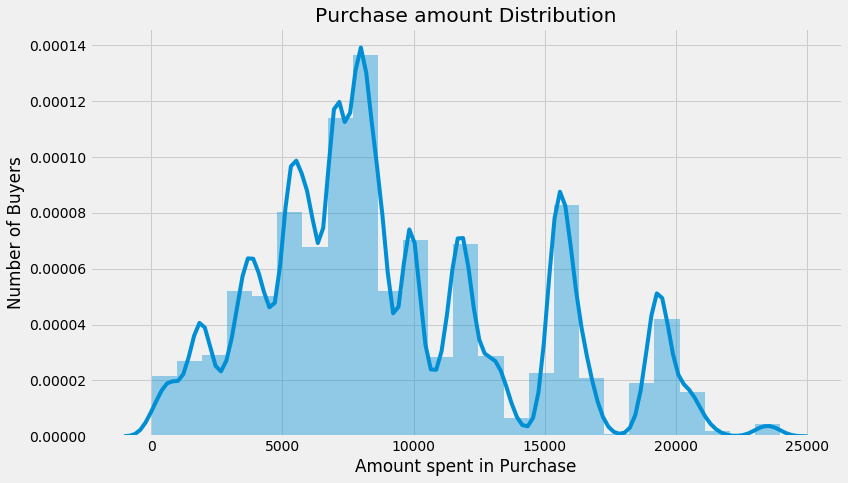

In [17]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(12,7))
sns.distplot(train.Purchase, bins = 25)
plt.xlabel("Amount spent in Purchase")
plt.ylabel("Number of Buyers")
plt.title("Purchase amount Distribution")

#### It seems like our target variable has an almost Gaussian distribution/ Normal Distribution.

### Finding Skewness and Curtosis 

In [18]:
print ("Skew is:", train.Purchase.skew())
print("Kurtosis: %f" % train.Purchase.kurt())

Skew is: 0.6001400037087128
Kurtosis: -0.338378


### Now that we’ve analysed our target variable, let’s consider our predictors(IV). Let’s start by seeing which of our features are numeric.

In [19]:
numeric_features = train.select_dtypes(include=[np.number])
numeric_features.dtypes

User_ID                 int64
Occupation              int64
Marital_Status          int64
Product_Category_1      int64
Product_Category_2    float64
Product_Category_3    float64
Purchase                int64
dtype: object

## Distribution of the variable Occupation

As seen in the beginning, Occupation has at least 20 different values. Since we do not known to each occupation each number corresponds, is difficult to make any analysis. 

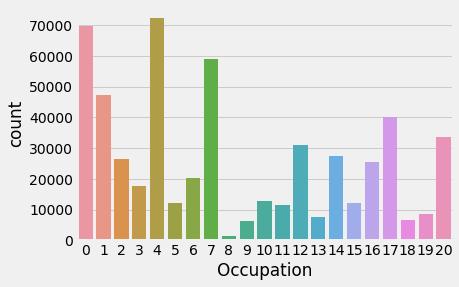

In [20]:
sns.countplot(train.Occupation)

## Distribution of the variable Marital_Status
As expected there are more single people buying products on Black Friday than married people, but do they spend more?

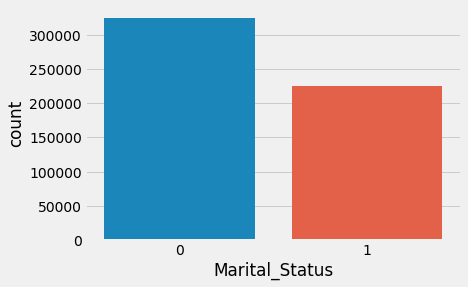

In [21]:
sns.countplot(train.Marital_Status)

## Distribution of the variable Product_Category_1
From the distribution for products from category one, it is clear that three products stand out, number 1, 5 and 8. Unfortunately, we do not know which product each number represents.

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]), <a list of 20 Text xticklabel objects>)

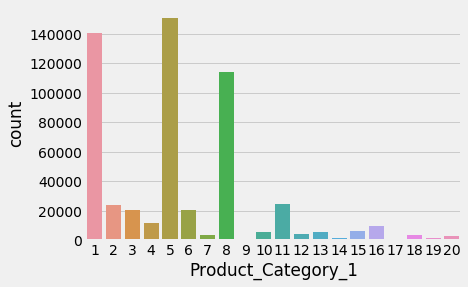

In [22]:
sns.countplot(train.Product_Category_1)
plt.xticks()

## Distribution of the variable Product_Category_2

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16]),
 <a list of 17 Text xticklabel objects>)

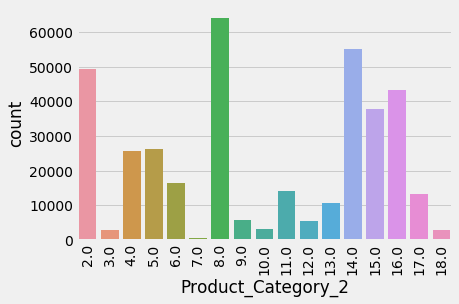

In [23]:
sns.countplot(train.Product_Category_2)
plt.xticks(rotation=90)

## Distribution of the variable Product_Category_3

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 <a list of 15 Text xticklabel objects>)

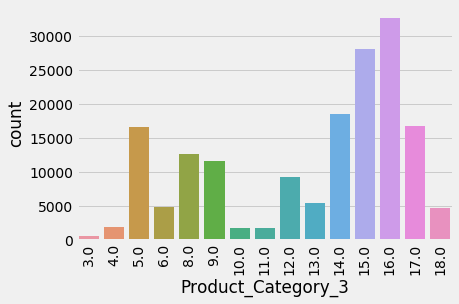

In [24]:
sns.countplot(train.Product_Category_3)
plt.xticks(rotation=90)

## Correlation between Numerical Predictor( IV) and Target variable(DV)

In [25]:
corr = numeric_features.corr()

print (corr['Purchase'].sort_values(ascending=False)[:10], '\n')
print (corr['Purchase'].sort_values(ascending=False)[-10:])

Purchase              1.000000
Occupation            0.020833
User_ID               0.004716
Marital_Status       -0.000463
Product_Category_3   -0.022006
Product_Category_2   -0.209918
Product_Category_1   -0.343703
Name: Purchase, dtype: float64 

Purchase              1.000000
Occupation            0.020833
User_ID               0.004716
Marital_Status       -0.000463
Product_Category_3   -0.022006
Product_Category_2   -0.209918
Product_Category_1   -0.343703
Name: Purchase, dtype: float64


#### There does not seem to be any predictor that would have a high impact on Purchase , since the highest correlation is give by Occupation with 0.0208. On the other hand, Product_Category_1 has a negative correlation with our target with the value -0.3437 which is somehow odd.

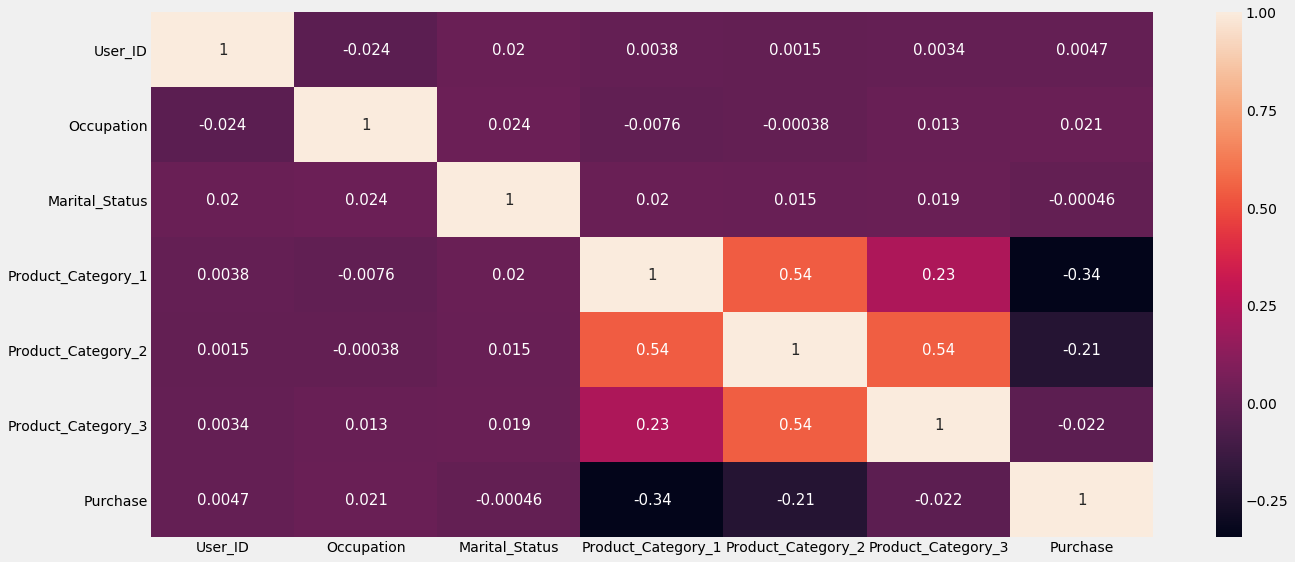

In [26]:
#correlation matrix
f, ax = plt.subplots(figsize=(20, 9))
sns.heatmap(corr,  annot=True,annot_kws={'size': 15})

#### There seems to be no multicollinearity with our predictors which is a good thing, although there is some correlation among the product categories. 

In [27]:
s = corr.unstack()
s

User_ID             User_ID               1.000000
                    Occupation           -0.023971
                    Marital_Status        0.020443
                    Product_Category_1    0.003825
                    Product_Category_2    0.001529
                    Product_Category_3    0.003419
                    Purchase              0.004716
Occupation          User_ID              -0.023971
                    Occupation            1.000000
                    Marital_Status        0.024280
                    Product_Category_1   -0.007618
                    Product_Category_2   -0.000384
                    Product_Category_3    0.013263
                    Purchase              0.020833
Marital_Status      User_ID               0.020443
                    Occupation            0.024280
                    Marital_Status        1.000000
                    Product_Category_1    0.019888
                    Product_Category_2    0.015138
                    Product_Cat

## Categorical Predictors    

### Distribution of the variable Gender
Most of the buyers are males, but who spends more on each purchase: man or woman?

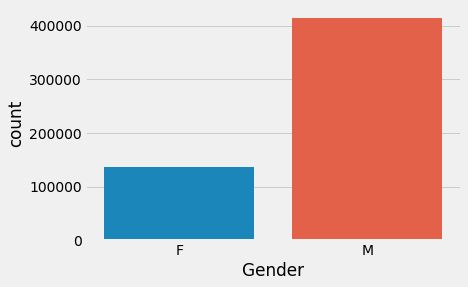

In [28]:
sns.countplot(train.Gender)

## Distribution of the variable Age

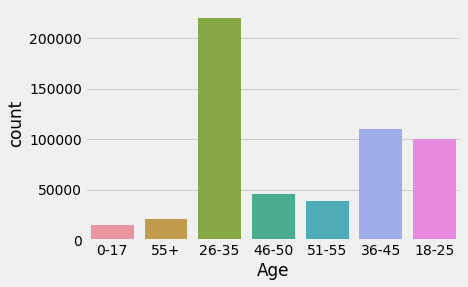

In [29]:
sns.countplot(train.Age)

# As expected, most purchases are made by people between 18 to 45 years old.

## Distribution of the variable City_Category

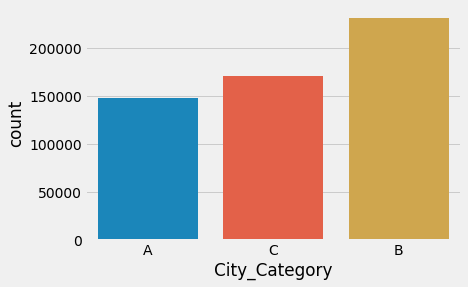

In [30]:
sns.countplot(train.City_Category)

### Distribution of the variable Stay_In_Current_City_Years

The tendency looks like the longest someone is living in that city the less prone they are to buy new things. Hence, if someone is new in town and needs a great number of new things for their house that they’ll take advantage of the low prices in Black Friday to purchase all the things needed.

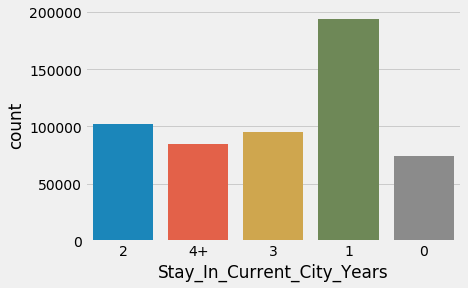

In [31]:
sns.countplot(train.Stay_In_Current_City_Years)

# Bivariate Analysis

### now it is time to understand the relationship between our target variable and predictors as well as the relationship among predictors.    

## 1 -Occupation and Purchase analysis

Although there are some occupations which have higher representations, it seems that the amount each user spends on average is more or less the same for all occupations. Of course, in the end, occupations with the highest representations will have the highest amounts of purchases.

In [32]:
Occupation_pivot = \
train.pivot_table(index='Occupation', values="Purchase", aggfunc=np.mean)


In [33]:
Occupation_pivot

,Purchase
Occupation,
0,9124.428588
1,8953.193270
2,8952.481683
3,9178.593088
4,9213.980251
5,9333.149298
6,9256.535691
7,9425.728223
8,9532.592497


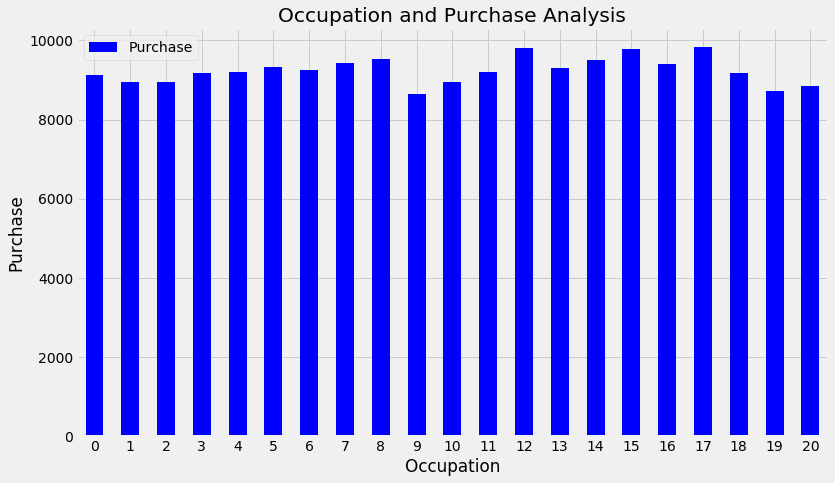

In [34]:
Occupation_pivot.plot(kind='bar', color='blue',figsize=(12,7))
plt.xlabel("Occupation")
plt.ylabel("Purchase")
plt.title("Occupation and Purchase Analysis")
plt.xticks(rotation=0)
plt.show()

## 2 - Marital_Status and Purchase Analysis

We had more single customers than married. However, on average an individual customer tends to spend the same amount independently if his/her is married or not

In [35]:
Marital_Status_pivot = \
train.pivot_table(index='Marital_Status', values="Purchase", aggfunc=np.mean)

In [36]:
Marital_Status_pivot

,Purchase
Marital_Status,
0,9265.907619
1,9261.174574


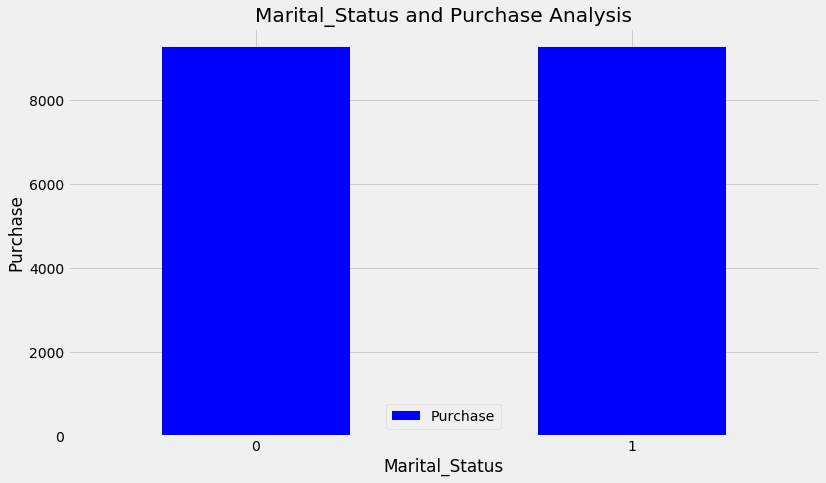

In [37]:
Marital_Status_pivot.plot(kind='bar', color='blue',figsize=(12,7))
plt.xlabel("Marital_Status")
plt.ylabel("Purchase")
plt.title("Marital_Status and Purchase Analysis")
plt.xticks(rotation=0)
plt.show()

## 3 - Product_category_1and Purchase analysis

If you see the value spent on average for Product_Category_1 you see that although there were more products bought for categories 1,5,8 the average amount spent for those three is not the highest. It is interesting to see other categories appearing with high purchase values despite having low impact on sales number.

In [38]:
Product_category_1_pivot = train.pivot_table(index='Product_Category_1', values="Purchase", aggfunc=np.mean)

In [39]:
Product_category_1_pivot

,Purchase
Product_Category_1,
1,13606.218596
2,11251.935384
3,10096.705734
4,2329.659491
5,6240.088178
6,15838.478550
7,16365.689600
8,7498.958078
9,15537.375610


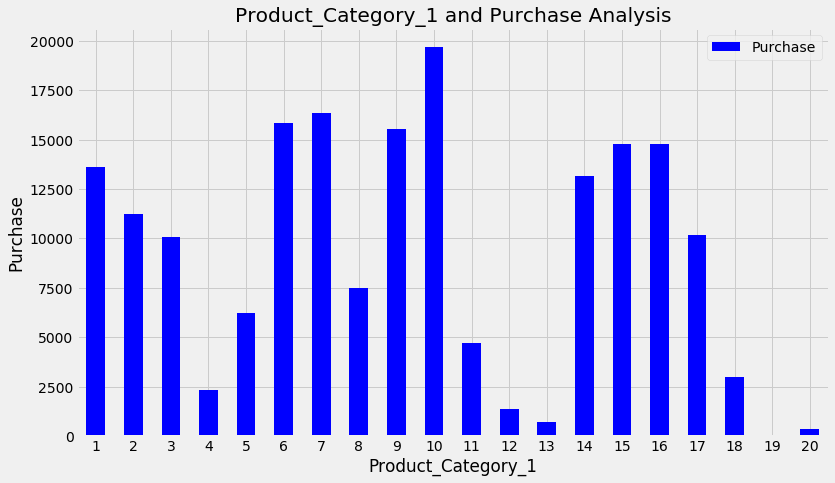

In [40]:
Product_category_1_pivot.plot(kind='bar', color='blue',figsize=(12,7))
plt.xlabel("Product_Category_1")
plt.ylabel("Purchase")
plt.title("Product_Category_1 and Purchase Analysis")
plt.xticks(rotation=0)
plt.show()

In [41]:
Product_category_1_pivot = train.pivot_table(index='Product_Category_1', values="Purchase", aggfunc=np.sum)
Product_category_1_pivot

,Purchase
Product_Category_1,
1,1910013754
2,268516186
3,204084713
4,27380488
5,941835229
6,324150302
7,60896731
8,854318799
9,6370324


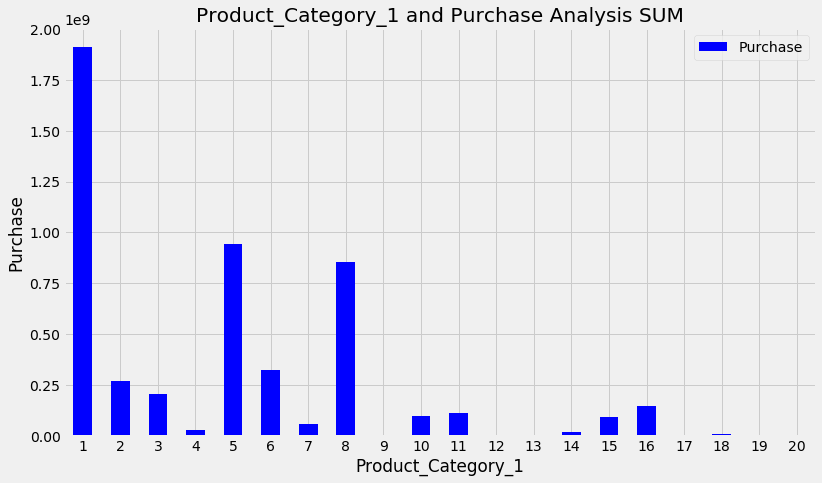

In [42]:
Product_category_1_pivot.plot(kind='bar', color='blue',figsize=(12,7))
plt.xlabel("Product_Category_1")
plt.ylabel("Purchase")
plt.title("Product_Category_1 and Purchase Analysis " "SUM")
plt.xticks(rotation=0)
plt.show()

## 4 - Product_Category_2 and Purchase Analysis

In [43]:
Product_category_2_pivot = train.pivot_table(index='Product_Category_2', values="Purchase", aggfunc=np.mean)

In [44]:
Product_category_2_pivot

,Purchase
Product_Category_2,
2.0,13619.356401
3.0,11235.359570
4.0,10215.192001
5.0,9027.821574
6.0,11503.551379
7.0,6884.683706
8.0,10273.259518
9.0,7277.006851
10.0,15648.729543


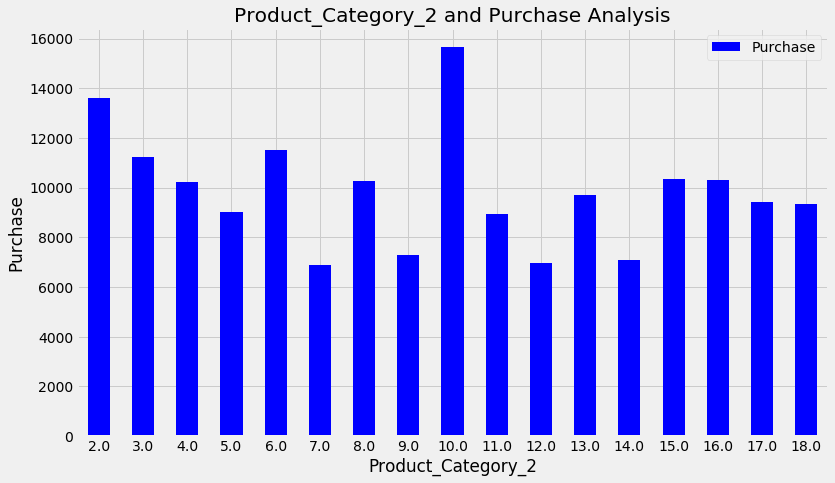

In [45]:
Product_category_2_pivot.plot(kind='bar', color='blue',figsize=(12,7))
plt.xlabel("Product_Category_2")
plt.ylabel("Purchase")
plt.title("Product_Category_2 and Purchase Analysis")
plt.xticks(rotation=0)
plt.show()

In [46]:
Product_category_2_pivot = train.pivot_table(index='Product_Category_2', values="Purchase", aggfunc=np.sum)

In [47]:
Product_category_2_pivot

# In product_category_2 product no 2, 8 have high average purchasing.

,Purchase
Product_Category_2,
2.0,670303864
3.0,32402777
4.0,262295485
5.0,236844899
6.0,189417477
7.0,4309812
8.0,658392656
9.0,41428000
10.0,47619084


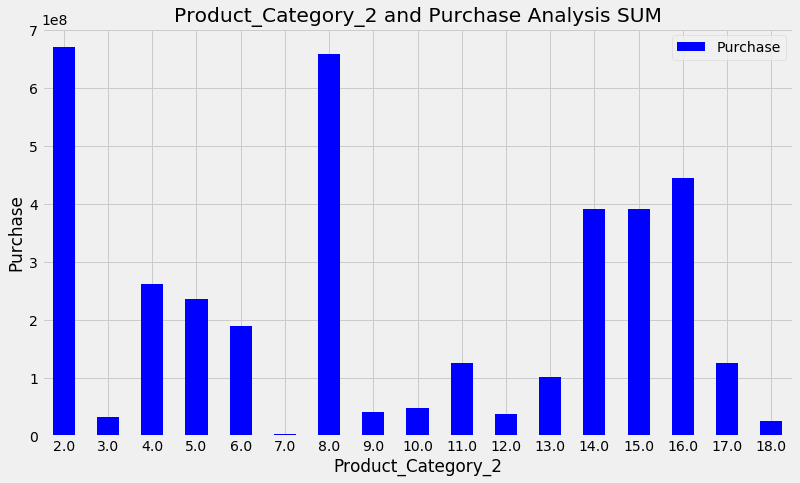

In [48]:
Product_category_2_pivot.plot(kind='bar', color='blue',figsize=(12,7))
plt.xlabel("Product_Category_2")
plt.ylabel("Purchase")
plt.title("Product_Category_2 and Purchase Analysis "  "SUM")
plt.xticks(rotation=0)
plt.show()

## 5 - Product_Category_3 and Purchase Analysis

In [49]:
Product_category_3_pivot = train.pivot_table(index='Product_Category_3', values="Purchase", aggfunc=np.mean)
Product_category_3_pivot

,Purchase
Product_Category_3,
3.0,13939.696574
4.0,9794.386667
5.0,12117.786889
6.0,13194.311043
8.0,13024.918882
9.0,10431.697210
10.0,13505.813441
11.0,12091.437673
12.0,8715.512762


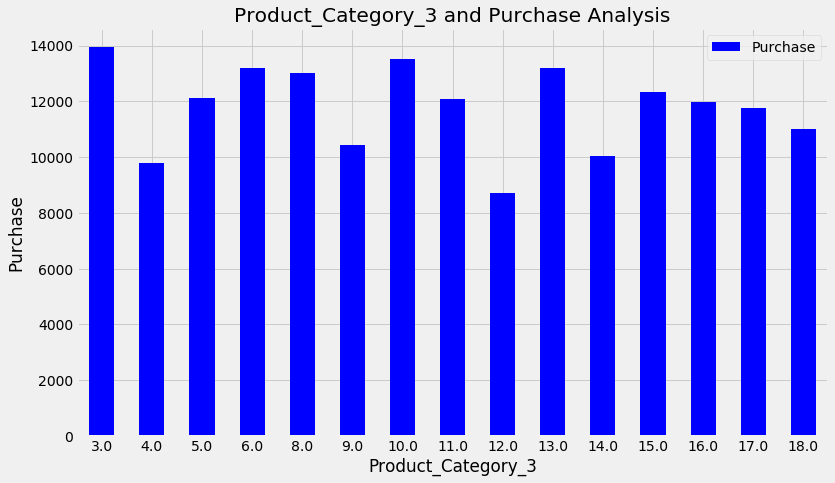

In [50]:
Product_category_3_pivot.plot(kind='bar', color='blue',figsize=(12,7))
plt.xlabel("Product_Category_3")
plt.ylabel("Purchase")
plt.title("Product_Category_3 and Purchase Analysis")
plt.xticks(rotation=0)
plt.show()

In [51]:
Product_category_3_pivot = train.pivot_table(index='Product_Category_3', values="Purchase", aggfunc=np.sum)
Product_category_3_pivot

,Purchase
Product_Category_3,
3.0,8545034
4.0,18364475
5.0,201858094
6.0,64520181
8.0,163619031
9.0,120788622
10.0,23311034
11.0,21825045
12.0,80583631


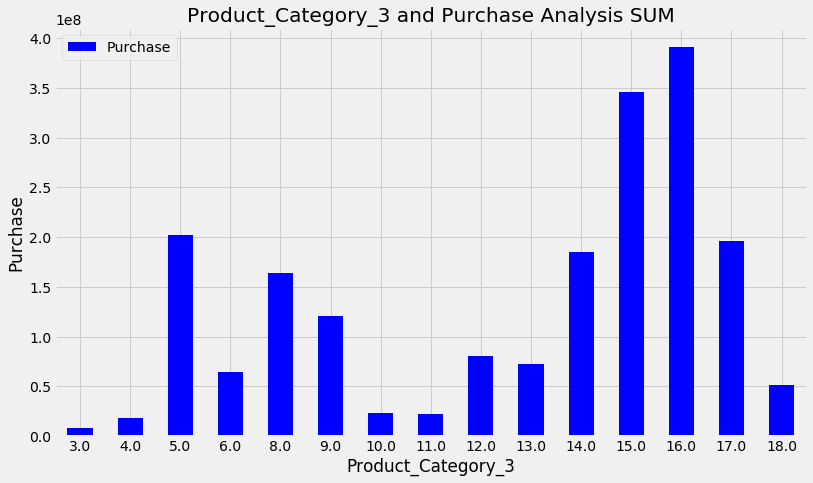

In [52]:
Product_category_3_pivot.plot(kind='bar', color='blue',figsize=(12,7))
plt.xlabel("Product_Category_3")
plt.ylabel("Purchase")
plt.title("Product_Category_3 and Purchase Analysis " "SUM")
plt.xticks(rotation=0)
plt.show()

#  BIVARIATE ANALYSIS based on Categorical Variables

## 6 -Gender and Purchase analysis

##### On average the male gender spends more money on purchase contrary to female, and it is possible to also observe this trend by adding the total value of purchase. This last conclusion is more reasonable since the percentage of male buyers is higher than female buyers.

In [53]:
gender_pivot = train.pivot_table(index='Gender', values="Purchase", aggfunc=np.mean)
gender_pivot


,Purchase
Gender,
F,8734.565765
M,9437.526040


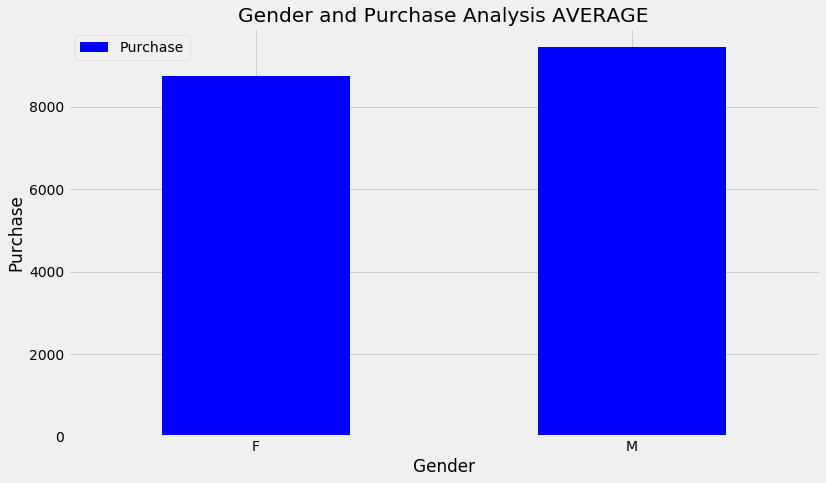

In [54]:
gender_pivot.plot(kind='bar', color='blue',figsize=(12,7))
plt.xlabel("Gender")
plt.ylabel("Purchase")
plt.title("Gender and Purchase Analysis " "AVERAGE")
plt.xticks(rotation=0)
plt.show()

## 7 -Age and Purchase Analysis

###### Total amount spent in purchase is in accordance with the number of purchases made, distributed by age.

In [55]:
age_pivot = train.pivot_table(index='Age', values="Purchase", aggfunc=np.sum)
age_pivot


,Purchase
Age,
0-17,134913183
18-25,913848675
26-35,2031770578
36-45,1026569884
46-50,420843403
51-55,367099644
55+,200767375


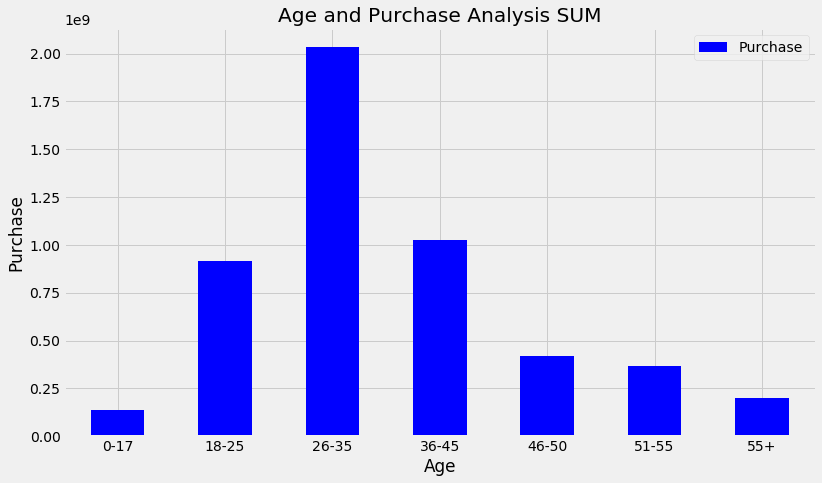

In [56]:
age_pivot.plot(kind='bar', color='blue',figsize=(12,7))
plt.xlabel("Age")
plt.ylabel("Purchase")
plt.title("Age and Purchase Analysis " "SUM")
plt.xticks(rotation=0)
plt.show()

## 8 - City_Category and Purchase analysis
##### We saw previously that city type ‘B’ had the highest number of purchases registered. However, the city whose buyers spend the most is city type ‘C’.

In [57]:
city_pivot = train.pivot_table(index='City_Category', values="Purchase", aggfunc=np.mean)
city_pivot


,Purchase
City_Category,
A,8911.939216
B,9151.300563
C,9719.920993


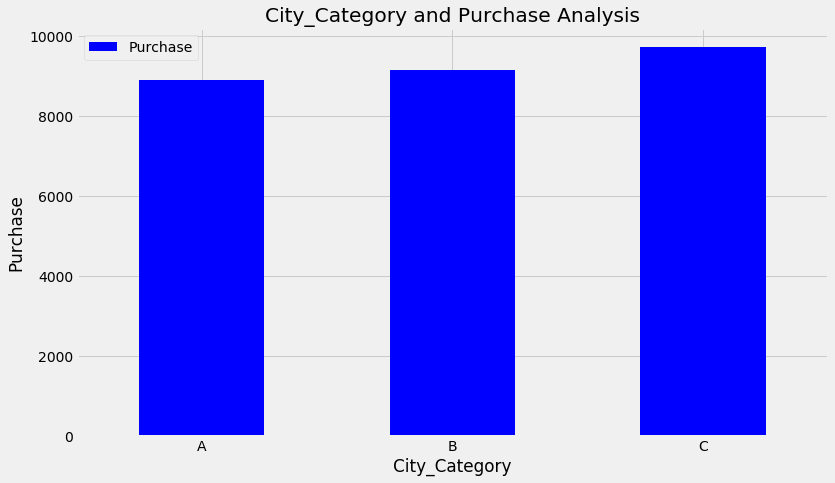

In [58]:
city_pivot.plot(kind='bar', color='blue',figsize=(12,7))
plt.xlabel("City_Category")
plt.ylabel("Purchase")
plt.title("City_Category and Purchase Analysis")
plt.xticks(rotation=0)
plt.show()

## 9 - Stay_In_Current_City_Years and Purchase analysis

###### Again, we see the same pattern seen before which show that on average people tend to spend the same amount on purchases regardeless of their group. People who are new in city are responsible for the higher number of purchase, however looking at it individually they tend to spend the same amount independently of how many years the have lived in their current city.

In [59]:
Stay_In_Current_City_Years_pivot = train.pivot_table(index='Stay_In_Current_City_Years', values="Purchase", aggfunc=np.mean)
Stay_In_Current_City_Years_pivot


,Purchase
Stay_In_Current_City_Years,
0,9180.075123
1,9250.145923
2,9320.429810
3,9286.904119
4+,9275.598872


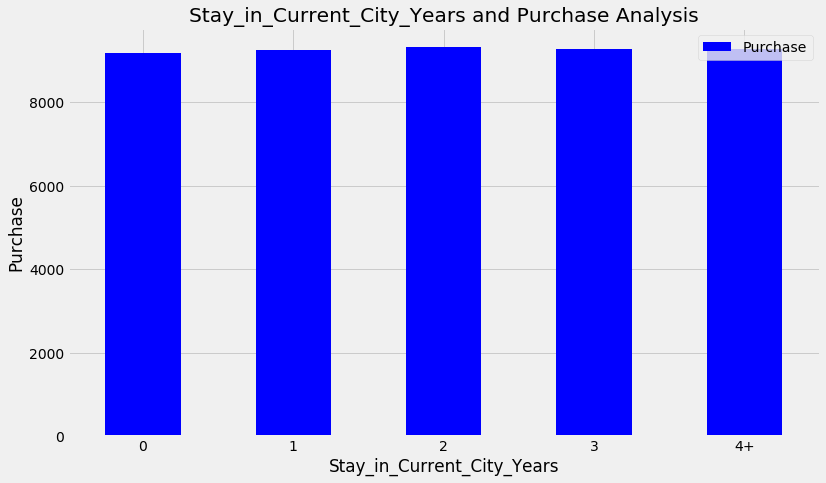

In [60]:
Stay_In_Current_City_Years_pivot.plot(kind='bar', color='blue',figsize=(12,7))
plt.xlabel("Stay_in_Current_City_Years")
plt.ylabel("Purchase")
plt.title("Stay_in_Current_City_Years and Purchase Analysis")
plt.xticks(rotation=0)
plt.show()

# 2 - Data Pre-Processing

#### Usually, datasets for every challenge such as those presented in Analytics Vidhya or Kaggle come seperated as a train.csv and a test.csv. It is generally a good idea to combine both sets into one, in order to perform data cleaning and feature engineering and later divide them again. With this step we do not have to go through the trouble of repeting twice the same code, for both datasets. Let’ s combine them into a dataframe datawith a sourcecolumn specifying where each observation belongs.

In [61]:
# Join Train and Test Dataset
train['source']='train'
test['source']='test'

data = pd.concat([train,test], ignore_index = True, sort = False)

print(train.shape, test.shape, data.shape)

(550068, 13) (233599, 12) (783667, 13)


In [62]:
data

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,source
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370.0,train
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200.0,train
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422.0,train
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057.0,train
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969.0,train
5,1000003,P00193542,M,26-35,15,A,3,0,1,2.0,NaN,15227.0,train
6,1000004,P00184942,M,46-50,7,B,2,1,1,8.0,17.0,19215.0,train
7,1000004,P00346142,M,46-50,7,B,2,1,1,15.0,NaN,15854.0,train
8,1000004,P0097242,M,46-50,7,B,2,1,1,16.0,NaN,15686.0,train
9,1000005,P00274942,M,26-35,20,A,1,1,8,NaN,NaN,7871.0,train


In [63]:
data.shape

(783667, 13)

In [64]:
#Check the percentage of null values per variable

# 31% approx in product cat 2 and 69% approx in product cat 3 data is missing

data.isnull().sum()/data.shape[0]*100

User_ID                        0.000000
Product_ID                     0.000000
Gender                         0.000000
Age                            0.000000
Occupation                     0.000000
City_Category                  0.000000
Stay_In_Current_City_Years     0.000000
Marital_Status                 0.000000
Product_Category_1             0.000000
Product_Category_2            31.388587
Product_Category_3            69.648078
Purchase                      29.808452
source                         0.000000
dtype: float64

# Imputing the value Zero

In [65]:

data.Product_Category_2.value_counts().sort_index()

2.0     70498
3.0      4123
4.0     36705
5.0     37165
6.0     23575
7.0       854
8.0     91317
9.0      8177
10.0     4420
11.0    20230
12.0     7801
13.0    15054
14.0    78834
15.0    54114
16.0    61687
17.0    19104
18.0     4027
Name: Product_Category_2, dtype: int64

In [66]:
data["Product_Category_2"]= data["Product_Category_2"].fillna(-2.0).astype("float")

data.Product_Category_2.value_counts().sort_index()

-2.0     245982
 2.0      70498
 3.0       4123
 4.0      36705
 5.0      37165
 6.0      23575
 7.0        854
 8.0      91317
 9.0       8177
 10.0      4420
 11.0     20230
 12.0      7801
 13.0     15054
 14.0     78834
 15.0     54114
 16.0     61687
 17.0     19104
 18.0      4027
Name: Product_Category_2, dtype: int64

In [67]:
data.isnull().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2                 0
Product_Category_3            545809
Purchase                      233599
source                             0
dtype: int64

In [68]:
data.Product_Category_3.value_counts().sort_index()

3.0       878
4.0      2691
5.0     23799
6.0      6888
8.0     17861
9.0     16532
10.0     2501
11.0     2585
12.0    13115
13.0     7849
14.0    26283
15.0    39968
16.0    46469
17.0    23818
18.0     6621
Name: Product_Category_3, dtype: int64

In [69]:
data["Product_Category_3"]= \
data["Product_Category_3"].fillna(-2.0).astype("float")

In [70]:
data.Product_Category_3.value_counts().sort_index()

-2.0     545809
 3.0        878
 4.0       2691
 5.0      23799
 6.0       6888
 8.0      17861
 9.0      16532
 10.0      2501
 11.0      2585
 12.0     13115
 13.0      7849
 14.0     26283
 15.0     39968
 16.0     46469
 17.0     23818
 18.0      6621
Name: Product_Category_3, dtype: int64

In [71]:
data.isnull().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2                 0
Product_Category_3                 0
Purchase                      233599
source                             0
dtype: int64

In [72]:
# Removing Product_Category_1 group 19 and 20 from Train as this is not in Product_Category_2 and 3

In [73]:
data.shape

(783667, 13)

In [74]:
#Get index of all columns with product_category_1 equal 19 or 20 from train

condition = data.index[(data.Product_Category_1.isin([19,20])) & (data.source == "train")]
data = data.drop(condition)

In [75]:

data.shape

(779514, 13)

In [76]:
# Categorical Values

In [77]:
#Apply function len(unique()) to every data variable

data.apply(lambda x: len(x.unique()))

User_ID                        5891
Product_ID                     3672
Gender                            2
Age                               7
Occupation                       21
City_Category                     3
Stay_In_Current_City_Years        5
Marital_Status                    2
Product_Category_1               18
Product_Category_2               18
Product_Category_3               16
Purchase                      17996
source                            2
dtype: int64

In [78]:
# Frequency Analysis

In [79]:
#Filter categorical variables and get dataframe will all strings columns names except Item_identfier and outlet_identifier
category_cols = data.select_dtypes(include=['object']).columns.drop(["source"])
#Print frequency of categories
for col in category_cols:
    #Number of times each value appears in the column
    frequency = data[col].value_counts()
    print("\nThis is the frequency distribution for " + col + ":")
    print(frequency)


This is the frequency distribution for Product_ID:
P00265242    2709
P00025442    2310
P00110742    2292
P00112142    2279
P00046742    2084
P00057642    2079
P00184942    2066
P00058042    2014
P00237542    1999
P00145042    1991
P00117942    1985
P00110942    1976
P00059442    1949
P00010742    1922
P00255842    1914
P00110842    1834
P00220442    1833
P00051442    1794
P00117442    1785
P00102642    1782
P00242742    1774
P00148642    1758
P00031042    1737
P00278642    1735
P00080342    1719
P00028842    1713
P00034742    1690
P00251242    1682
P00114942    1673
P00000142    1636
             ... 
P00298342       1
P00206542       1
P00203242       1
P00309842       1
P00239442       1
P00081642       1
P00285142       1
P00204642       1
P00062242       1
P00270342       1
P00167342       1
P00224642       1
P00340742       1
P00063742       1
P00064542       1
P00350742       1
P00364342       1
P00299042       1
P00132742       1
P00359842       1
P00072142       1
P00038642   

# 3. Feature Engineering
## 1. Converting gender to binary

In [80]:
#Turn gender binary
gender_dict = {'F':0, 'M':1}
data["Gender"] = data["Gender"].apply(lambda line: gender_dict[line])

data["Gender"].value_counts()

1    587052
0    192462
Name: Gender, dtype: int64

## 2. Converting Age to numeric values

In [81]:
# Giving Age Numerical values
age_dict = {'0-17':0, '18-25':1, '26-35':2, '36-45':3, '46-50':4, '51-55':5, '55+':6}
data["Age"] = data["Age"].apply(lambda line: age_dict[line])

data["Age"].value_counts()

2    311554
3    155898
1    141209
4     64902
5     54450
6     30316
0     21185
Name: Age, dtype: int64

##  3. Converting city_category to binary

In [82]:
city_dict = {'A':0, 'B':1, 'C':2}
data["City_Category"] = data["City_Category"].apply(lambda line: city_dict[line])

data["City_Category"].value_counts()

1    328524
2    241487
0    209503
Name: City_Category, dtype: int64

## 4. Converting Stay_In_Current_City_Years to binary

In [83]:
#Import library:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

#New variable for outlet
data['Stay_In_Current_City_Years'] = le.fit_transform(data['Stay_In_Current_City_Years'])
    
#Dummy Variables:
data = pd.get_dummies(data, columns=['Stay_In_Current_City_Years'])

data.dtypes

User_ID                           int64
Product_ID                       object
Gender                            int64
Age                               int64
Occupation                        int64
City_Category                     int64
Marital_Status                    int64
Product_Category_1                int64
Product_Category_2              float64
Product_Category_3              float64
Purchase                        float64
source                           object
Stay_In_Current_City_Years_0      uint8
Stay_In_Current_City_Years_1      uint8
Stay_In_Current_City_Years_2      uint8
Stay_In_Current_City_Years_3      uint8
Stay_In_Current_City_Years_4      uint8
dtype: object

## 5. Function to create count features

In [84]:
# feature representing the count of each user
def getCountVar(compute_df, count_df, var_name):
    grouped_df = count_df.groupby(var_name)
    count_dict = {}
    for name, group in grouped_df:
        count_dict[name] = group.shape[0]

    count_list = []
    for index, row in compute_df.iterrows():
        name = row[var_name]
        count_list.append(count_dict.get(name, 0))
    return count_list

In [85]:
#data["User_ID_Count"]  = getCountVar(data, data, "User_ID")
data["Age_Count"]  =getCountVar(data, data, "Age")
data["Occupation_Count"]  =getCountVar(data, data, "Occupation")
data["Product_Category_1_Count"]  =getCountVar(data, data,"Product_Category_1")
data["Product_Category_2_Count"]  =getCountVar(data, data, "Product_Category_2")
data["Product_Category_3_Count"]  =getCountVar(data, data,"Product_Category_3")
data["Product_ID_Count"]  =getCountVar(data, data, "Product_ID")

## 6.Exporting Data

In [86]:
#Divide into test and train:
train = data.loc[data['source']=="train"]
test = data.loc[data['source']=="test"]

#Drop unnecessary columns:
test.drop(['source'],axis=1,inplace=True)
train.drop(['source'],axis=1,inplace=True)

#Export files as modified versions:
train.to_csv("train_modified.csv",index=False)
test.to_csv("test_modified.csv",index=False)

C:\Users\Public\Anaconda3\lib\site-packages\pandas\core\frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [ ]:
# 4. Model

In [87]:
train_df = pd.read_csv('train_modified.csv')
test_df = pd.read_csv('test_modified.csv')

In [88]:
train_df

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,...,Stay_In_Current_City_Years_1,Stay_In_Current_City_Years_2,Stay_In_Current_City_Years_3,Stay_In_Current_City_Years_4,Age_Count,Occupation_Count,Product_Category_1_Count,Product_Category_2_Count,Product_Category_3_Count,Product_ID_Count
0,1000001,P00069042,0,0,10,0,0,3,-2.0,-2.0,...,0,1,0,0,21185,18171,28791,241829,541656,344
1,1000001,P00248942,0,0,10,0,0,1,6.0,14.0,...,0,1,0,0,21185,18171,200699,23575,26283,845
2,1000001,P00087842,0,0,10,0,0,12,-2.0,-2.0,...,0,1,0,0,21185,18171,5610,241829,541656,150
3,1000001,P00085442,0,0,10,0,0,12,14.0,-2.0,...,0,1,0,0,21185,18171,5610,78834,541656,496
4,1000002,P00285442,1,6,16,2,0,8,-2.0,-2.0,...,0,0,0,1,30316,35944,162294,241829,541656,283
5,1000003,P00193542,1,2,15,0,0,1,2.0,-2.0,...,0,0,1,0,311554,17257,200699,70498,541656,863
6,1000004,P00184942,1,4,7,1,1,1,8.0,17.0,...,0,1,0,0,64902,83667,200699,91317,23818,2066
7,1000004,P00346142,1,4,7,1,1,1,15.0,-2.0,...,0,1,0,0,64902,83667,200699,54114,541656,826
8,1000004,P0097242,1,4,7,1,1,1,16.0,-2.0,...,0,1,0,0,64902,83667,200699,61687,541656,1304
9,1000005,P00274942,1,2,20,0,1,8,-2.0,-2.0,...,1,0,0,0,311554,47654,162294,241829,541656,1139


In [89]:
train_df.dtypes

User_ID                           int64
Product_ID                       object
Gender                            int64
Age                               int64
Occupation                        int64
City_Category                     int64
Marital_Status                    int64
Product_Category_1                int64
Product_Category_2              float64
Product_Category_3              float64
Purchase                        float64
Stay_In_Current_City_Years_0      int64
Stay_In_Current_City_Years_1      int64
Stay_In_Current_City_Years_2      int64
Stay_In_Current_City_Years_3      int64
Stay_In_Current_City_Years_4      int64
Age_Count                         int64
Occupation_Count                  int64
Product_Category_1_Count          int64
Product_Category_2_Count          int64
Product_Category_3_Count          int64
Product_ID_Count                  int64
dtype: object

In [97]:
#Define target and ID columns:
target = 'Purchase'
IDcol = ['User_ID','Product_ID']
from sklearn import model_selection, metrics


def modelfit(alg, dtrain, dtest, predictors, target, IDcol, filename):
    #Fit the algorithm on the data
    alg.fit(dtrain[predictors], dtrain[target])
        
    #Predict training set:
    dtrain_predictions = alg.predict(dtrain[predictors])

    #Perform model_selection:
    cv_score = model_selection.cross_val_score(alg, dtrain[predictors],(dtrain[target]) , cv=20, scoring='neg_mean_squared_error')
    cv_score = np.sqrt(np.abs(cv_score))
    
    #Print model report:
    print("\nModel Report")
    print("RMSE : %.4g" % np.sqrt(metrics.mean_squared_error((dtrain[target]).values, dtrain_predictions)))
    print("CV Score : Mean - %.4g | Std - %.4g | Min - %.4g | Max - %.4g" % (np.mean(cv_score),np.std(cv_score),np.min(cv_score),np.max(cv_score)))
    
    #Predict on testing data:
    dtest[target] = alg.predict(dtest[predictors])
    
    #Export submission file:
    IDcol.append(target)
    submission = pd.DataFrame({ x: dtest[x] for x in IDcol})
    submission.to_csv(filename, index=False)

In [98]:

from sklearn.linear_model import LinearRegression
LR = LinearRegression(normalize=True)

predictors = train_df.columns.drop(['Purchase','Product_ID','User_ID'])
modelfit(LR, train_df, test_df, predictors, target, IDcol, 'LR.csv')

coef1 = pd.Series(LR.coef_, predictors).sort_values()


Model Report
RMSE : 4339
CV Score : Mean - 4339 | Std - 30.21 | Min - 4283 | Max - 4394


In [99]:
from sklearn.tree import DecisionTreeRegressor
DT = DecisionTreeRegressor(max_depth=15, min_samples_leaf=100)
modelfit(DT, train_df, test_df, predictors, target, IDcol, 'DT.csv')

coef3 = pd.Series(DT.feature_importances_, predictors).sort_values(ascending=False)


Model Report
RMSE : 2680
CV Score : Mean - 2719 | Std - 18.98 | Min - 2684 | Max - 2749


# 5. Conclusion
The ML algorithm that perform the best was Decision Tree Model with RMSE = 2680 which got me in the first 42%